<div align="center">
   <h1>ANÁLISIS PREDICTIVO</h1>
</div>

A continuación se presenta el análisis predictivo. Realizamos una regresión lineal sobre los salarios en el tiempo, y obtuvimos predicciones salariales para 2025

In [8]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#DATABASE LOADING

import os
import requests

file_path = os.path.join(os.getcwd(),r"linkedindatabase.db")

if not os.path.exists(file_path):
    print('Database not ready. Loading...')
    try:
        # URL of your Google Drive database file (direct download link)
        url = "https://drive.google.com/uc?id=1e_PSowuukgifVA7rzqkvhDuCud-YDxtN"
        # Send a GET request to download the file
        response = requests.get(url)
        # Save the content to a local file (in the Binder container or local disk)
        with open('linkedindatabase.db', 'wb') as f:
            f.write(response.content)
        print("Database available!")
    except Exception as e:
        print("Failed to fetch database: {e}")
else:
    print('Database already loaded!')

Database not ready. Loading...
Database available!


In [3]:
#DATABASE CONNECTION
#file_path = r"linkedindatabase.db"
file_path = r"C:\Users\Sarah\Code\ProyectoABD\database\linkedindatabase.db"
conn = sqlite3.connect(file_path)

In [ ]:
#DATAFRAME CREATION

#numerical data
df_num = pd.read_sql('SELECT * FROM clean_numerical_postings', conn)

df_num = df_num[df_num['max_salary'] <= 10000000]
df_num = df_num[df_num['min_salary'] <= 10000000]
df_num = df_num[df_num['normalized_salary'] <= 10000000]

df_num = df_num[df_num['max_salary'] > 100]
df_num = df_num[df_num['min_salary'] > 100]
df_num = df_num[df_num['normalized_salary'] > 100]

#postings
df_postings = pd.read_sql('SELECT * FROM postings', conn)

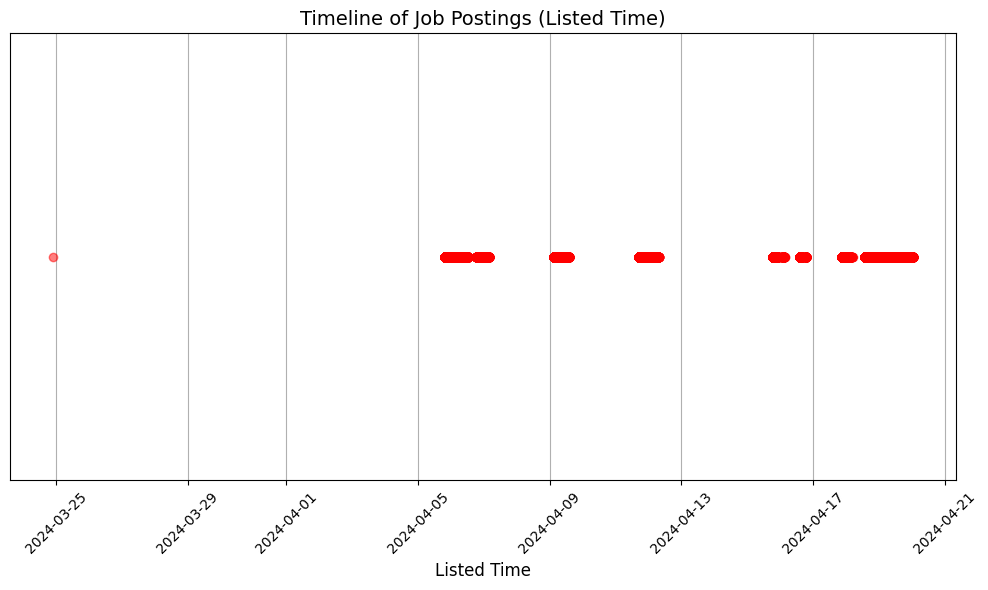

In [ ]:
# Convert 'listed_time' from milliseconds to seconds and then to datetime
df_postings['listed_time'] = pd.to_datetime(df_postings['listed_time'] / 1000, unit='s')

# Plotting the timeline
plt.figure(figsize=(10, 6))
plt.plot(df_postings['listed_time'], [1] * len(df_postings), 'ro', alpha=0.5)  # Plot points at y=1 for each entry
plt.yticks([])  # Remove y-axis ticks as it's not necessary for this plot
plt.xlabel('Listed Time', fontsize=12)
plt.title('Timeline of Job Postings (Listed Time)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()


In [19]:
# Sort the dataframe by 'listed_time' in descending order
latest_entry = df_postings.sort_values(by='listed_time', ascending=True).iloc[0]

# If 'listed_time' is in milliseconds, convert to seconds by dividing by 1000
timestamp_in_seconds = latest_entry['listed_time'] / 1000

# Convert the latest 'listed_time' (Unix timestamp) to a datetime object
latest_listed_time = pd.to_datetime(timestamp_in_seconds, unit='s')

# Format the datetime object to Year-Month-Day
formatted_date = latest_listed_time.strftime('%Y-%m-%d')

print(formatted_date)


2024-03-24


Root Mean Squared Error (RMSE): 6160395.2905429


c:\Users\Sarah\Code\ProyectoABD\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   Month-Year  Predicted Average Salary
0     2024-01              1.053309e+06
1     2024-02              8.023801e+05
2     2024-03              5.676405e+05
3     2024-04              3.167119e+05
4     2024-05              7.387783e+04
5     2024-06             -1.770507e+05
6     2024-07             -4.198848e+05
7     2024-08             -6.708134e+05
8     2024-09             -9.217419e+05
9     2024-10             -1.164576e+06
10    2024-11             -1.415505e+06
11    2024-12             -1.658339e+06
12    2025-01             -1.909267e+06
13    2025-02             -2.160196e+06
14    2025-03             -2.386841e+06
15    2025-04             -2.637769e+06
16    2025-05             -2.880604e+06
17    2025-06             -3.131532e+06
18    2025-07             -3.374366e+06
19    2025-08             -3.625295e+06
20    2025-09             -3.876223e+06
21    2025-10             -4.119057e+06
22    2025-11             -4.369986e+06
23    2025-12             -4.612820e+06


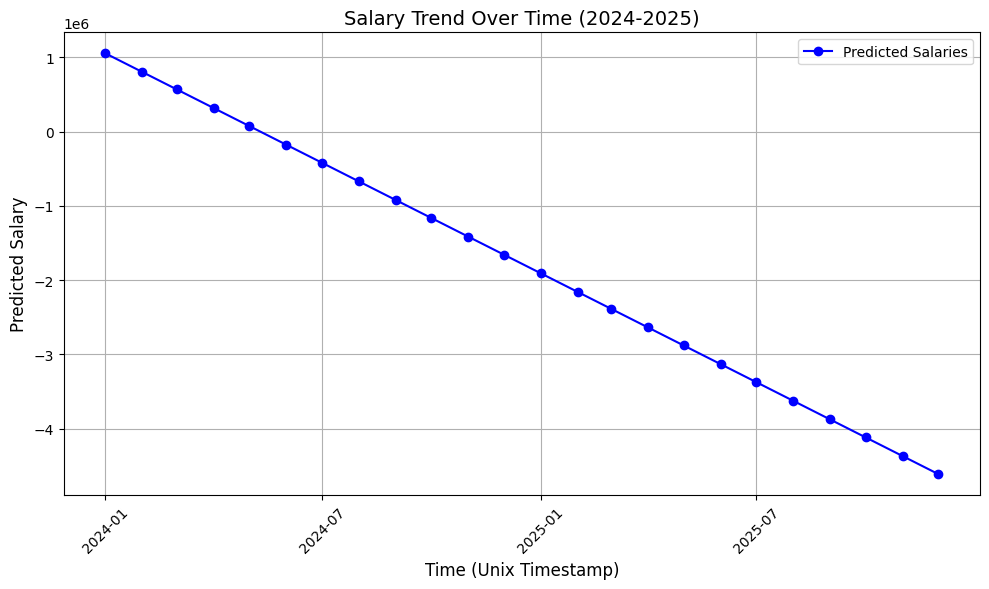

In [16]:
# Apply dropna() to the entire dataframe to ensure X and y are aligned
df_clean_postings = df_postings.dropna(subset=['listed_time', 'normalized_salary'])

# Prepare the features (independent variables)
X = df_clean_postings[['listed_time']] /1000 # Directly using the Unix timestamp as the feature
y = df_clean_postings['normalized_salary']  # This is the target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Predict for the next year (2025)
# Generate Unix timestamps for the current year and next year
current_year_timestamp = pd.to_datetime('2024-01-01').timestamp()
next_year_timestamp = pd.to_datetime('2025-01-01').timestamp()

# Create a list of Unix timestamps for each month of 2024 and 2025
timestamps = []
for year in [2024, 2025]:
    for month in range(1, 13):
        timestamps.append(pd.to_datetime(f'{year}-{month:02d}-01').timestamp())

# Predict salaries for these timestamps
predicted_salaries = model.predict(np.array(timestamps).reshape(-1, 1))

# Prepare the data to display
months = []
salaries = []
for i, timestamp in enumerate(timestamps):
    month_year = pd.to_datetime(timestamp, unit='s').strftime('%Y-%m')
    months.append(month_year)
    salaries.append(predicted_salaries[i])

# Create a dataframe for the table
predictions_df = pd.DataFrame({
    'Month-Year': months,
    'Predicted Average Salary': salaries
})

# Print the table
print(predictions_df)

# Plotting the salary curve over time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, predicted_salaries, label='Predicted Salaries', color='b', marker='o')
plt.xlabel('Time (Unix Timestamp)', fontsize=12)
plt.ylabel('Predicted Salary', fontsize=12)
plt.title('Salary Trend Over Time (2024-2025)', fontsize=14)
plt.xticks(ticks=timestamps[::6], labels=months[::6], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.legend()
plt.show()


In [24]:

# Apply dropna() to the entire dataframe to ensure X and y are aligned
df_clean = df_postings.dropna(subset=['listed_time', 'normalized_salary'])

# Convert 'listed_time' from milliseconds to seconds (by dividing by 1000)
df_clean['listed_time'] = df_clean['listed_time'] / 1000  # Convert to seconds

# Filter the data to only include listings between 2024-03-20 and 2024-04-20
df_clean['listed_time'] = pd.to_datetime(df_clean['listed_time'], unit='s')
df_clean = df_clean[(df_clean['listed_time'] >= pd.to_datetime('2024-03-20')) & 
                    (df_clean['listed_time'] <= pd.to_datetime('2024-04-20'))]

# Prepare the features (independent variables) and target (dependent variable)
X = df_clean[['listed_time']].astype(np.int64) // 10**9  # Convert to Unix timestamp in seconds
y = df_clean['normalized_salary']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the data
model.fit(X, y)

# Predict for May 2024 (using the Unix timestamp for May 1, 2024)
may_2024_timestamp = pd.to_datetime('2024-05-01').timestamp()

# Make a prediction for May 2024
predicted_salary_may = model.predict(np.array([[may_2024_timestamp]]))

# Print the prediction for May 2024
print(f"Predicted Salary for May 2024: {predicted_salary_may[0]:.2f}")

# Plotting the salary trend over time (training data and prediction for May 2024)
plt.figure(figsize=(10, 6))

# Plot the historical data (March 20, 2024 - April 20, 2024)
plt.scatter(df_clean['listed_time'], y, color='grey', alpha=0.5, label='Historical Data')

# Plot the predicted salary for May 2024 (as a point on the timeline)
plt.scatter(pd.to_datetime('2024-05-01'), predicted_salary_may, color='red', label='Predicted Salary for May 2024', zorder=5)

# Formatting the plot
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Salary', fontsize=12)
plt.title('Salary Trend (2024-03-20 to 2024-05-01)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.legend()
plt.show()


TypeError: cannot perform __truediv__ with this index type: DatetimeArray